# **ANALISI SERIE TEMPORALI**

In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')
import seaborn as sns
!pip install pmdarima
from pmdarima.arima import ADFTest,auto_arima

Il codice nel file "CSV_creator.py" permette di creare il file "Stats.csv" attinendo dal database dei log, tuttavia in questo caso si utilizza il file "Stats_test.csv" creato appositamente e contenente un numero sufficiente di campioni per allenare il modello.

In [174]:
#Upload .csv
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Stats_test.csv']))
df['datetime']=pd.to_datetime(df['datetime'],format='%d-%m-%Y')
df.set_index('datetime',inplace=True)

Saving Stats_test.csv to Stats_test (5).csv


In [175]:
#Testing for stationarity
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

In [176]:
#Creazione train e test set 
total_size=len(df)
train_size=math.floor(0.7*total_size) 
train=df.head(train_size)
test=df.tail(len(df) -train_size)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2021-09-01 to 2021-11-12
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   requests  73 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2021-11-13 to 2021-12-14
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   requests  32 non-null     int64
dtypes: int64(1)
memory usage: 512.0 bytes


In [183]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=15, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=824.454, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=813.686, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=794.349, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=793.785, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=794.643, Time=0.26 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=795.582, Time=0.13 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=795.582, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=812.060, Time=0.22 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=797.581, Time=0.41 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 2.586 seconds


In [184]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   73
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -394.893
Date:                             Wed, 05 Jan 2022   AIC                            793.785
Time:                                     09:45:44   BIC                            797.974
Sample:                                          0   HQIC                           795.424
                                              - 73                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9243      0.124     -7.466      0.000      -1.167      -0.682
sigma2       2.96e+04   1632.046     18.136      0.000    2.64e+04    3.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1051.12
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              21.37   Skew:                            -4.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [185]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 32),index=test.index)
prediction.columns = ['predicted_requests']
prediction

,predicted_requests
datetime,
2021-11-13,338.764323
2021-11-14,394.764323
2021-11-15,370.764323
2021-11-16,439.764323
2021-11-17,410.764323
2021-11-18,295.764323
2021-11-19,125.764323
2021-11-20,465.764323
2021-11-21,630.764323


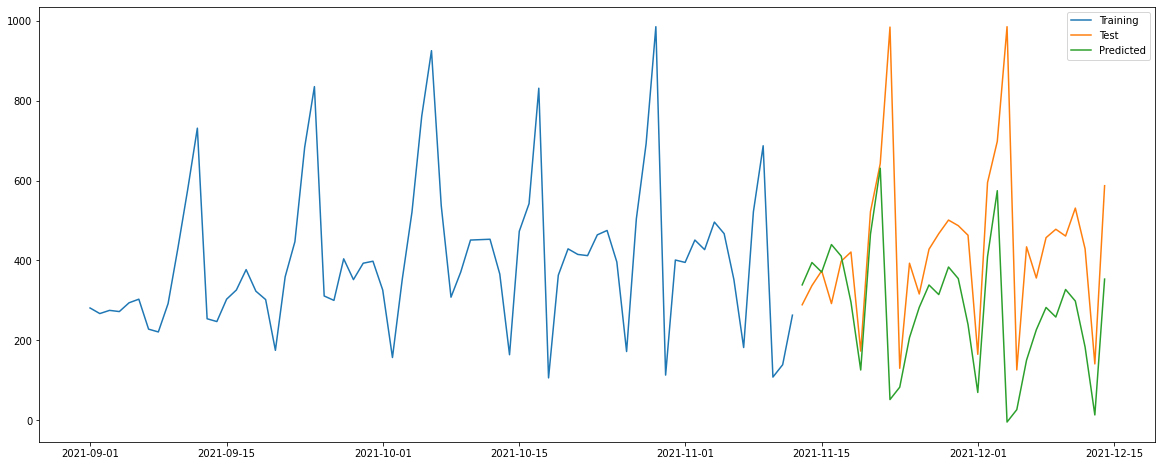

In [186]:
plt.figure(figsize=(20,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [187]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.requests, prediction.predicted_requests))
print('RMSE = '+str(rms))

RMSE = 279.2666249472681
